## <p style = "text-align:center;"><b> Downloading and creating the Amazon review dataset</b></p>

 - ### **NOTE:** This data is not in pure JSON and will need to be converted using ndjson
 - ### Creating two sample datasets: 
     - One with a balanced amount of reviews that's representative of reviews
     - One that is 100k completely random reviews


### **NOTE**: *Done in a separate notebook*

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ndjson
sns.set_theme(style='dark', color_codes=True, font_scale=1.5)

#NLP
# import nltk
# import textblob


#Annoying warnings begone!
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=FutureWarning) 
warnings.filterwarnings("ignore", category=UserWarning) 

In [24]:
#reading in json file using ndjson
with open ('.../datasets/Video_Games_5.json', 'r') as f:
    json_dataset = ndjson.load(f)

In [25]:
#converting the dataset to a DataFrame
df = pd.DataFrame(json_dataset)

In [26]:
#DF EDA:
df.head()

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style,image
0,5.0,True,"10 17, 2015",A1HP7NVNPFMA4N,0700026657,Ambrosia075,"This game is a bit hard to get the hang of, bu...",but when you do it's great.,1445040000,NaN,NaN,NaN
1,4.0,False,"07 27, 2015",A1JGAP0185YJI6,0700026657,travis,I played it a while but it was alright. The st...,"But in spite of that it was fun, I liked it",1437955200,NaN,NaN,NaN
2,3.0,True,"02 23, 2015",A1YJWEXHQBWK2B,0700026657,Vincent G. Mezera,ok game.,Three Stars,1424649600,NaN,NaN,NaN
3,2.0,True,"02 20, 2015",A2204E1TH211HT,0700026657,Grandma KR,"found the game a bit too complicated, not what...",Two Stars,1424390400,NaN,NaN,NaN
4,5.0,True,"12 25, 2014",A2RF5B5H74JLPE,0700026657,jon,"great game, I love it and have played it since...",love this game,1419465600,NaN,NaN,NaN


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497577 entries, 0 to 497576
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   overall         497577 non-null  float64
 1   verified        497577 non-null  bool   
 2   reviewTime      497577 non-null  object 
 3   reviewerID      497577 non-null  object 
 4   asin            497577 non-null  object 
 5   reviewerName    497501 non-null  object 
 6   reviewText      497419 non-null  object 
 7   summary         497468 non-null  object 
 8   unixReviewTime  497577 non-null  int64  
 9   vote            107793 non-null  object 
 10  style           289237 non-null  object 
 11  image           3634 non-null    object 
dtypes: bool(1), float64(1), int64(1), object(9)
memory usage: 42.2+ MB


In [28]:
#Dropping vote, style, and image as they are missing a lot of data and don't help much
df = df.drop(['vote', 'style', 'image'], axis=1)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497577 entries, 0 to 497576
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   overall         497577 non-null  float64
 1   verified        497577 non-null  bool   
 2   reviewTime      497577 non-null  object 
 3   reviewerID      497577 non-null  object 
 4   asin            497577 non-null  object 
 5   reviewerName    497501 non-null  object 
 6   reviewText      497419 non-null  object 
 7   summary         497468 non-null  object 
 8   unixReviewTime  497577 non-null  int64  
dtypes: bool(1), float64(1), int64(1), object(6)
memory usage: 30.8+ MB


*I believe we need asin, overall, reviewText, and summary*

In [30]:
updated_df = df[['asin', 'overall', 'reviewText', 'summary']].copy()

In [31]:
updated_df.describe()

,overall
count,497577.000000
mean,4.220456
std,1.185424
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [32]:
updated_df['overall'].value_counts()

overall
5.0    299759
4.0     93654
3.0     49146
1.0     30883
2.0     24135
Name: count, dtype: int64

In [33]:
updated_df.isnull().sum() 

asin            0
overall         0
reviewText    158
summary       109
dtype: int64

### Taking a look at what overall reviews there were when reviewtext or summary are blank

In [34]:
#Overall score averages when 'reviewText' and 'summary' are blank
review_blank = ((updated_df['overall'].loc[updated_df['reviewText'].isnull() == True]).mean())
summary_blank = ((updated_df['overall'].loc[updated_df['summary'].isnull() == True]).mean())

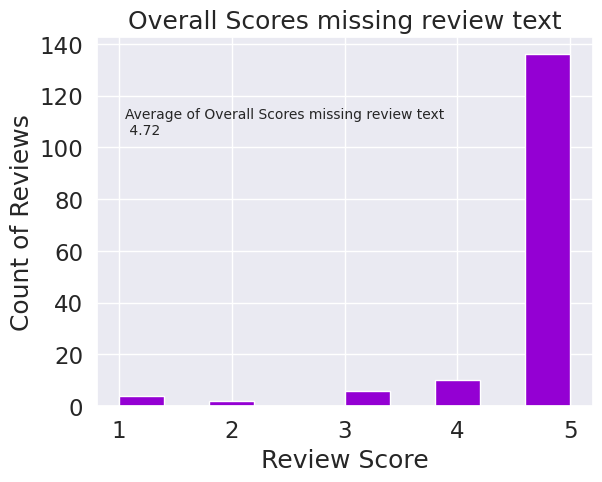

In [35]:
plt.hist((updated_df['overall'].loc[updated_df['reviewText'].isnull() == True]), color= 'darkviolet')
plt.grid()
plt.xlabel('Review Score')
plt.ylabel('Count of Reviews')
plt.text(1.05, 105, s=(f'Average of Overall Scores missing review text \n {review_blank:.2f}'), fontsize = 10, )
plt.title('Overall Scores missing review text')
plt.show()

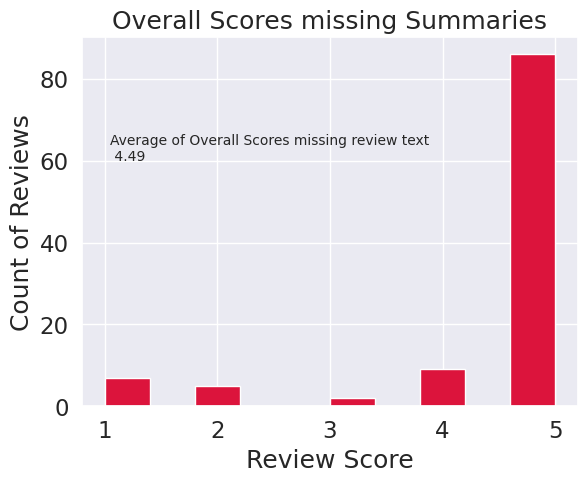

In [36]:
plt.hist((updated_df['overall'].loc[updated_df['summary'].isnull() == True]), color = 'crimson')
plt.grid()
plt.xlabel('Review Score')
plt.ylabel('Count of Reviews')
plt.text(1.05, 60, s=(f'Average of Overall Scores missing review text \n {summary_blank:.2f}'), fontsize = 10, )
plt.title('Overall Scores missing Summaries')

plt.show()

### We have more than enough data, so let's drop the reviews that are missing reviewText and summary data, given that they follow a similar trend to the rest of the dataset

In [37]:
updated_df = updated_df.dropna(how='any', subset=['reviewText', 'summary'])
print(updated_df.isnull().sum())

asin          0
overall       0
reviewText    0
summary       0
dtype: int64


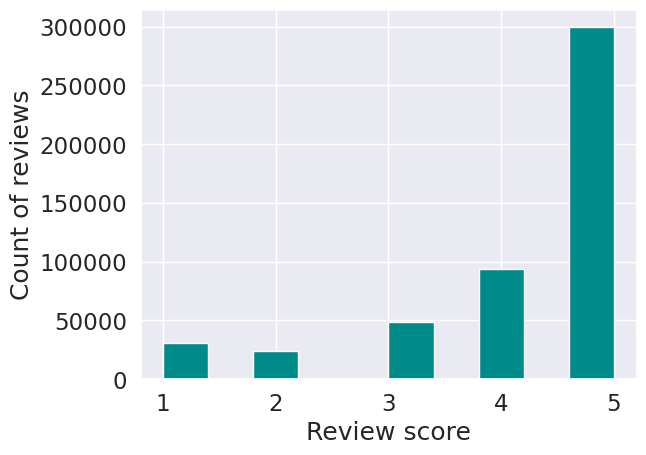

In [38]:
#Taking a look at our overall Score data distribution
plt.hist(updated_df['overall'], color = 'darkcyan')
plt.grid()
plt.xlabel('Review score')
plt.ylabel('Count of reviews')
plt.show()

### To build a balanced corpora, we should pull data that has 1.5k scores for 1 and 5, then 500 for scores 2-4 inclusive    

In [39]:
one_score = updated_df.loc[updated_df['overall'] == 1].sample(1500)
two_score = updated_df.loc[updated_df['overall'] == 2].sample(500)
three_score = updated_df.loc[updated_df['overall'] == 3].sample(500)
four_score = updated_df.loc[updated_df['overall'] == 4].sample(500)
five_score = updated_df.loc[updated_df['overall'] == 5].sample(1500)

In [40]:
#Building a new dataset containing each score using pd.concat
sampled_df = pd.concat([one_score, two_score, three_score, four_score, five_score])
sampled_df.head()

,asin,overall,reviewText,summary
63526,B0007RDM5Q,1.0,The graphics seem dated and rushed. The gamep...,-
272191,B007P6Y684,1.0,Cheap,One Star
295819,B00BQZ5EWW,1.0,background history\nI remember seeing ROME tot...,ROME II: BETA cause thats the quality they rel...
160184,B0016BVY7U,1.0,Do not buy this game! The installation code in...,Game won't install because the included code d...
425114,B0178FWY62,1.0,Its loud AF. Like one of the fans is hitting s...,Does not work as advertised.


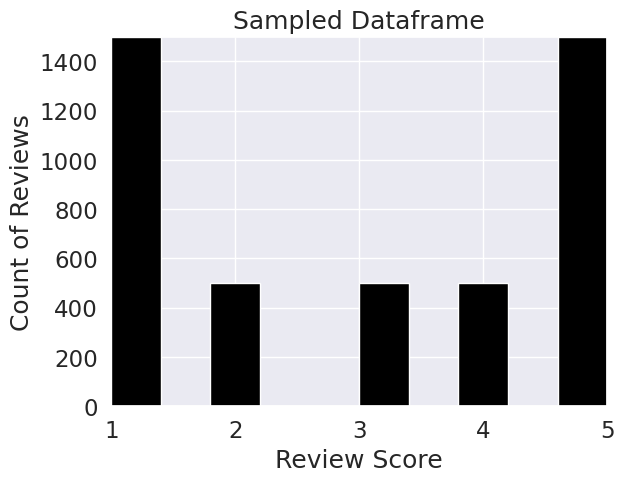

In [41]:
#Double checking we concat'd that df correctly
plt.hist(sampled_df['overall'], color = 'black')
plt.grid()
plt.xlabel('Review Score')
plt.ylabel('Count of Reviews')
plt.title('Sampled Dataframe')
plt.axis([1, 5, 0, 1500])
plt.show()

# Pulling our random 100k

In [42]:
rand_100k = updated_df.sample(n = 100000, random_state= 42) #Random_state so we get the same sample with each run

### *Sending these to .csv for our sentiment analyzer*

In [45]:
sampled_df.to_csv(path_or_buf = '.../datasets/sampled_data.csv', index=False)
rand_100k.to_csv(path_or_buf = '.../datasets/rand_100k.csv', index= False)